<a href="https://colab.research.google.com/github/gabrielcarcedo/RIFE-validation/blob/main/ResNet_Comparassion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook para comparar las arquitecturas clásicas de Redes Neuronales Recurrentes:

> - ## ResNet-18
> - ## ResNet-34
> - ## ResNet-50
> - ## ResNet-101
> - ## ResNet-152

## <strong>Objetivo:</strong> Clasificar imágenes del dataset de <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10</a>

![CIFAR-10 Dataset](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

> ### Presenta: Gabriel Carcedo Rodríguez
> ### Posgrado en Ciencias en Ingeniería de la Computación
> ### Universidad Nacional Autónoma de México


In [1]:
#@markdown # Paquetes Necesarios
#@markdown # Utilización del Framework <strong>Pytorch</strong>

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np


In [2]:
#@markdown # Configuración

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 128
EPOCHS = 3  # Reducido para demostración rápida


In [3]:
#@markdown # Transformaciones para CIFAR-10

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet requiere 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


In [4]:
#@markdown # Cargar dataset CIFAR-10

dataset_train = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
dataset_test = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=False)


100%|██████████| 170M/170M [00:06<00:00, 27.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
#@markdown # Función para entrenar y evaluar un modelo

def train_and_evaluate(model_name, model):
    print(f"Entrenando {model_name}...")

    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_losses = []
    val_losses = []

    # Entrenamiento
    for epoch in range(EPOCHS):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        print(f"{model_name} - Epoch [{epoch+1}/{EPOCHS}], Loss: {running_loss / len(train_loader):.4f}")

        # Evaluación
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(DEVICE), labels.to(DEVICE)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
        val_losses.append(val_loss / len(test_loader))

    # Evaluación de métricas de clasificación
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)

    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Precision: {precision:.4f}")
    print(f"{model_name} - Recall: {recall:.4f}")
    print(f"{model_name} - F1 Score: {f1:.4f}")
    print(f"{model_name} - Confusion Matrix:\n{cm}")

    return {
        "name": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
        "train_losses": train_losses,
        "val_losses": val_losses
    }


In [6]:
#@markdown # Modelos ResNet disponibles en torchvision

def run_model(model_name, model_func):
    model = model_func(pretrained=False)  # Sin pesos preentrenados para evaluación justa
    model.fc = nn.Linear(model.fc.in_features, 10)  # Ajuste para 10 clases
    results = train_and_evaluate(model_name, model)
    return results
models_results = []


In [ ]:
#@markdown # Ejecución de modelo <strong>ResNet-18</strong>

models_results.append(run_model("ResNet-18", models.resnet18))


Entrenando ResNet-18...
ResNet-18 - Epoch [1/3], Loss: 1.3931
ResNet-18 - Epoch [2/3], Loss: 0.8651
ResNet-18 - Epoch [3/3], Loss: 0.6298
ResNet-18 - Accuracy: 0.7302
ResNet-18 - Precision: 0.7634
ResNet-18 - Recall: 0.7302
ResNet-18 - F1 Score: 0.7178
ResNet-18 - Confusion Matrix:
[[806  10  40   0  28   0  20   3  70  23]
 [ 17 858   3   0   4   0   4   4  55  55]
 [ 57   0 612   5 139   4 132  25  25   1]
 [ 29   6  81 339 238  21 148  71  54  13]
 [  5   1  19   3 892   0  42  25  13   0]
 [ 10   1  83 101 183 358 100 136  19   9]
 [  4   3  13   2  60   0 897  10  11   0]
 [ 11   4  17   3 149   2  22 771  14   7]
 [ 50   4   1   1   2   0   6   3 929   4]
 [ 23  24   3   0  14   0   9   5  82 840]]


In [ ]:
#@markdown # Ejecución de modelo <strong>ResNet-34</strong>

models_results.append(run_model("ResNet-34", models.resnet34))


Entrenando ResNet-34...
ResNet-34 - Epoch [1/3], Loss: 1.4657
ResNet-34 - Epoch [2/3], Loss: 0.9022
ResNet-34 - Epoch [3/3], Loss: 0.6706
ResNet-34 - Accuracy: 0.7716
ResNet-34 - Precision: 0.7767
ResNet-34 - Recall: 0.7716
ResNet-34 - F1 Score: 0.7724
ResNet-34 - Confusion Matrix:
[[844   5  42   9  20   5   4   4  42  25]
 [ 36 859  14   3   2   5   4   3  27  47]
 [ 70   0 694  39  69  59  38  18  13   0]
 [ 22   1 105 569  49 180  23  33  13   5]
 [ 16   2  61  30 778  33  31  46   3   0]
 [ 11   0  62 109  46 713   3  51   5   0]
 [  9   0  67  80  44  53 734   6   7   0]
 [ 19   2  33  21  42  50   2 825   5   1]
 [ 70   7   4   7   4   5   1   2 883  17]
 [ 35  59  12  20   2   8   4  20  23 817]]


In [10]:
#@markdown # Ejecución de modelo <strong>ResNet-50</strong>

models_results.append(run_model("ResNet-50", models.resnet50))


Entrenando ResNet-50...
ResNet-50 - Epoch [1/3], Loss: 1.5317
ResNet-50 - Epoch [2/3], Loss: 1.0006
ResNet-50 - Epoch [3/3], Loss: 0.7720
ResNet-50 - Accuracy: 0.7231
ResNet-50 - Precision: 0.7458
ResNet-50 - Recall: 0.7231
ResNet-50 - F1 Score: 0.7236
ResNet-50 - Confusion Matrix:
[[860   4  55   3   8   2   4  42   5  17]
 [ 27 773   7   8   0   2   2  20  13 148]
 [ 56   1 686  41  95  47  19  51   2   2]
 [ 37   1  95 577  64 121  21  69   5  10]
 [ 16   1  66  44 710  25  20 116   1   1]
 [ 10   1  66 171  39 623   8  80   0   2]
 [ 12   1 111 128  70  20 622  22  12   2]
 [ 12   0  36  16  20  38   0 875   0   3]
 [281  10  13   9   9   2   0  20 610  46]
 [ 40  16   3   5   3   2   0  31   5 895]]


In [8]:
#@markdown # Ejecución de modelo <strong>ResNet-101</strong>

models_results.append(run_model("ResNet-101", models.resnet101))


In [ ]:
#@markdown # Ejecución de modelo <strong>ResNet-152</strong>

models_results.append(run_model("ResNet-152", models.resnet152))


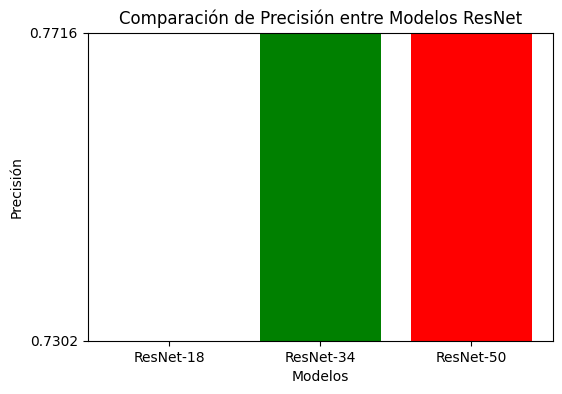

In [75]:
#@markdown # Comparación de precisión

plt.figure(figsize=(10,6))
model_names = [res["name"] for res in models_results]
accuracies = [res["accuracy"] for res in models_results]
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Modelos")
plt.ylabel("Precisión")
plt.title("Comparación de Precisión entre Modelos ResNet")
plt.ylim(0, 1)
plt.show()


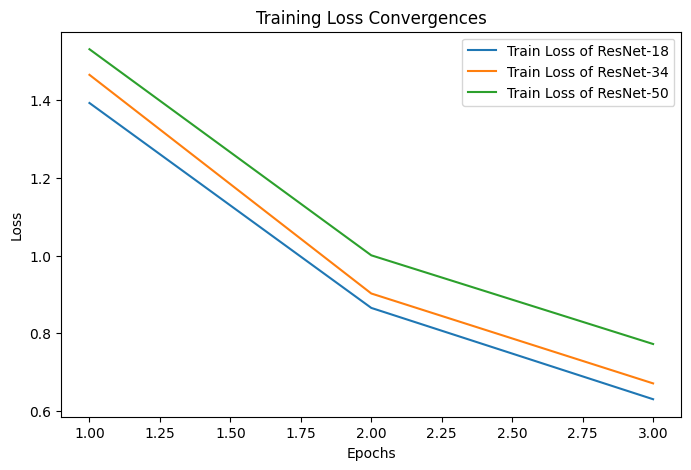

In [112]:
#@markdown # Visualización de las pérdidas de entrenamiento

for model_results in models_results:
    plt.figure(figsize=(8,5))
    model_name = model_results["name"]
    train_losses = model_results["train_losses"]
    plt.plot(range(1, EPOCHS+1), train_losses, label=f'Train Loss of {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Convergences')
    plt.legend()
    plt.show()


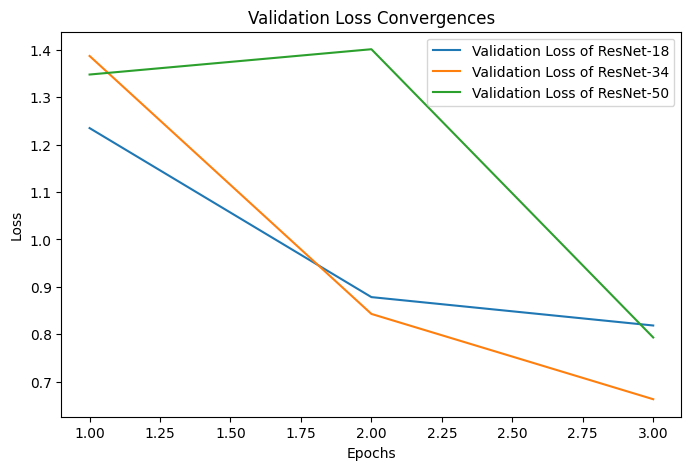

In [113]:
#@markdown # Visualización de las pérdidas de validación

for model_results in models_results:
    plt.figure(figsize=(8,5))
    model_name = model_results["name"]
    val_losses = model_results["val_losses"]
    plt.plot(range(1, EPOCHS+1), val_losses, label=f'Validation Loss of {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Validation Loss Convergences')
    plt.legend()
    plt.show()
